In [179]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

df = pd.read_csv('./btcusd.csv', sep=';', encoding='latin-1', usecols=["Date","y"], parse_dates={'ds' : ["Date"]})
print(df)

             ds        y
0    2020-05-29  9513.76
1    2020-05-28  9580.19
2    2020-05-27  9208.53
3    2020-05-26  8844.42
4    2020-05-25  8899.31
...         ...      ...
1990 2014-12-05   377.10
1991 2014-12-04   377.10
1992 2014-12-03   378.00
1993 2014-12-02   378.00
1994 2014-12-01   370.00

[1995 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


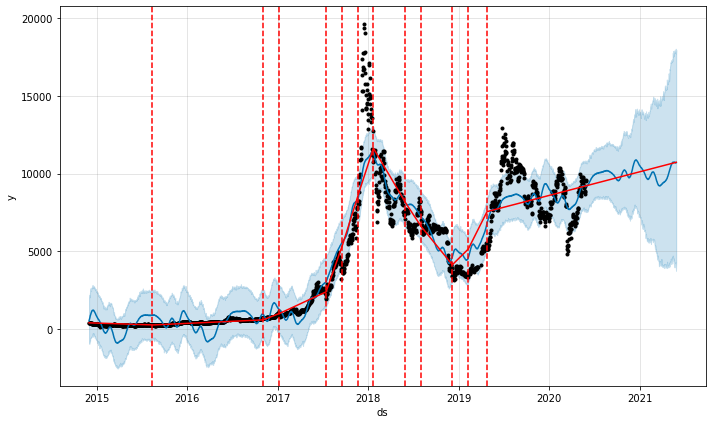

In [180]:
m = Prophet(changepoint_prior_scale=0.05, seasonality_mode='additive')
m.fit(df)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


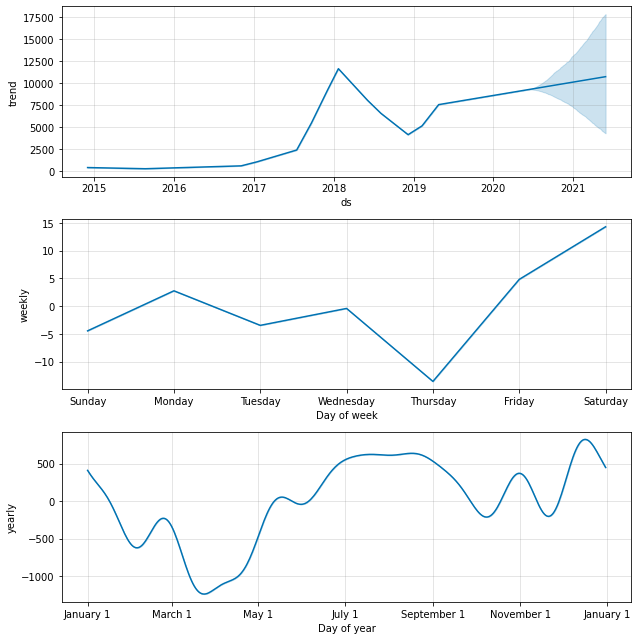

In [181]:
fig = m.plot_components(forecast)